In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
## aman
import warnings
warnings.filterwarnings('ignore') #supress warnings
#visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load train and test datasets
train_data = pd.read_csv('/Users/aman/ML-models/pa-as2-loan-predictions/train.csv')
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
# Load train and test datasets
test_data = pd.read_csv('/Users/aman/ML-models/pa-as2-loan-predictions/test.csv')
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


# 1. Data Wrangling or Exploratory Data Analysis (EDA)

### My understanding of dataset and feature distributions is as below:

#### Categorical Features:
- person_home_ownership
- loan_intent
- loan_grade
- cb_person_default_on_file

#### Numerical Features: 
- person_age
- person_income
- person_emp_length
- loan_amnt
- loan_int_rate
- loan_percent_income
- cb_person_cred_hist_length

#### Target Variable:
- loan_status --> binary (0,1)

### 1.1. Cleaning Train data and Test data (train.csv and test.csv)

In [4]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [5]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### 1.2 Converting features to INT

In [7]:
# converting to integer
def cleanprocess(df):

# set1 converting features to int
    df['person_home_ownership'].replace({'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}, inplace=True)
    df['loan_intent'].replace({'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}, inplace=True)
    df['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}, inplace=True)
    df['cb_person_default_on_file'].replace({'N': 0, 'Y': 1}, inplace=True)
    df['person_emp_length'] = df['person_emp_length'].astype(int)
    df['loan_int_rate'] = (df['loan_int_rate'] * 100).astype(int)
    df['loan_percent_income'] = (df['loan_percent_income'] * 100).astype(int)

cleanprocess(train_data)
cleanprocess(test_data)

In [8]:
train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0,1,1,6000,1149,17,0,14,0
1,1,22,56000,2,6,3,2,4000,1335,7,0,2,0
2,2,29,28800,2,8,4,0,6000,890,21,0,10,0
3,3,30,70000,3,14,5,1,12000,1111,17,0,5,0
4,4,22,60000,3,2,3,0,6000,692,10,0,3,0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          58645 non-null  int64
 1   person_age                  58645 non-null  int64
 2   person_income               58645 non-null  int64
 3   person_home_ownership       58645 non-null  int64
 4   person_emp_length           58645 non-null  int64
 5   loan_intent                 58645 non-null  int64
 6   loan_grade                  58645 non-null  int64
 7   loan_amnt                   58645 non-null  int64
 8   loan_int_rate               58645 non-null  int64
 9   loan_percent_income         58645 non-null  int64
 10  cb_person_default_on_file   58645 non-null  int64
 11  cb_person_cred_hist_length  58645 non-null  int64
 12  loan_status                 58645 non-null  int64
dtypes: int64(13)
memory usage: 5.8 MB


In [10]:
test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3,2,5,25000,1576,36,0,2
1,58646,26,96000,0,6,4,2,10000,1268,10,1,4
2,58647,26,30000,3,5,5,4,4000,1719,13,1,2
3,58648,33,50000,3,4,0,0,7000,890,14,0,7
4,58649,26,102000,0,8,2,3,15000,1632,15,1,4


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39098 entries, 0 to 39097
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   id                          39098 non-null  int64
 1   person_age                  39098 non-null  int64
 2   person_income               39098 non-null  int64
 3   person_home_ownership       39098 non-null  int64
 4   person_emp_length           39098 non-null  int64
 5   loan_intent                 39098 non-null  int64
 6   loan_grade                  39098 non-null  int64
 7   loan_amnt                   39098 non-null  int64
 8   loan_int_rate               39098 non-null  int64
 9   loan_percent_income         39098 non-null  int64
 10  cb_person_default_on_file   39098 non-null  int64
 11  cb_person_cred_hist_length  39098 non-null  int64
dtypes: int64(12)
memory usage: 3.6 MB


### 1.3 Checking for null values

In [12]:
cleaned_train_data = train_data
cleaned_train_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,3,0,1,1,6000,1149,17,0,14,0
1,1,22,56000,2,6,3,2,4000,1335,7,0,2,0
2,2,29,28800,2,8,4,0,6000,890,21,0,10,0
3,3,30,70000,3,14,5,1,12000,1111,17,0,5,0
4,4,22,60000,3,2,3,0,6000,692,10,0,3,0


In [13]:
cleaned_test_data = test_data
cleaned_test_data.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,3,3,2,5,25000,1576,36,0,2
1,58646,26,96000,0,6,4,2,10000,1268,10,1,4
2,58647,26,30000,3,5,5,4,4000,1719,13,1,2
3,58648,33,50000,3,4,0,0,7000,890,14,0,7
4,58649,26,102000,0,8,2,3,15000,1632,15,1,4


### 1.4 Exporting cleaned processed train.csv to train_cleaned_data.csv

In [14]:
cleaned_train_data.to_csv('cleaned_train_data.csv', index=False)

### 1.5 Exporting cleaned processed test.csv to test_cleaned_data.csv

In [15]:
cleaned_test_data.to_csv('cleaned_test_data.csv', index=False)

# 2. Summary of the above:
1. The dataset represents relatively young borrowers with moderate incomes.
2. There are potential outliers in age and employment length.
3. There are few categorical features.
4. There is no missing data.
5. Most loans are relatvely small to moderate in size.

# 3. Model

### 3.1 Model-1: Train Model

#### Linear Regression model to find the RMSE

In [16]:
# Splitting data into features (X) and target (y)
X = cleaned_train_data.drop(['loan_status', 'id'], axis=1)  # Drop the target variable and id
y = cleaned_train_data['loan_status']


#spliting training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [17]:
print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

-0.029024067743137205


,Coefficient
person_age,1.963458e-03
person_income,5.842073e-07
person_home_ownership,2.047881e-02
person_emp_length,-1.505140e-03
loan_intent,-9.628320e-03
loan_grade,1.815970e-01
loan_amnt,-1.256605e-05
loan_int_rate,-2.541424e-04
loan_percent_income,1.778775e-02
cb_person_default_on_file,-2.906423e-02


In [18]:
#applying model for predictions
predictions = lm.predict(X_test)

In [19]:
#evaluating the model
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.20509031705586064
MSE: 0.08734341888613938
RMSE: 0.29553920025292646


# 4. Final Model: XGBoost and Rdige

In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier  # XGBoost for classification
from sklearn.linear_model import Ridge  # Ridge for regression
from sklearn.metrics import roc_auc_score

In [21]:
# Load datasets
train_data2 = pd.read_csv('/Users/aman/ML-models/pa-as2-loan-predictions/cleaned_train_data.csv')
test_data2 = pd.read_csv('/Users/aman/ML-models/pa-as2-loan-predictions/cleaned_test_data.csv')

In [22]:
# Preprocess Data (Encoding categorical features)
label_encoders = {}
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

for col in categorical_cols:
    le = LabelEncoder()
    train_data2[col] = le.fit_transform(train_data2[col])
    test_data2[col] = le.transform(test_data2[col])  # Ensure consistent encoding for test data
    label_encoders[col] = le

In [23]:
# Feature and target selection
X = train_data2[['id','person_age','person_income','person_home_ownership','person_emp_length',
                'loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income',
                'cb_person_default_on_file','cb_person_cred_hist_length']]

y = train_data2['loan_status']  # Assuming this is binary classification (0 or 1)

# XGBoost Model start

In [24]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import time

# Assuming `X` and `y` are the full feature matrix and target vector
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# Initialize the XGBClassifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Initialize GridSearchCV with verbose output for status updates
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Progress tracking and time measurement
print("Starting grid search...")
start_time = time.time()

# Fit the grid search to find the best parameters
grid_search.fit(X_train, y_train)
end_time = time.time()

# Retrieve best model and scores
best_xgb_model = grid_search.best_estimator_
best_auc_score = grid_search.best_score_

# Calculate elapsed time and evaluate AUC on validation set
elapsed_time = end_time - start_time
y_val_pred_proba_xgb = best_xgb_model.predict_proba(X_val)[:, 1]
roc_auc_xgb = roc_auc_score(y_val, y_val_pred_proba_xgb)

# Display results
print(f"\nGrid Search completed.")
print(f"Elapsed time: {elapsed_time // 60:.0f} minutes and {elapsed_time % 60:.0f} seconds")
print(f"Best AUC score achieved from Grid Search: {best_auc_score:.4f}")
print(f"Tuned XGBoost ROC AUC on validation set: {roc_auc_xgb:.4f}")


Starting grid search...
Fitting 5 folds for each of 6561 candidates, totalling 32805 fits

Grid Search completed.
Elapsed time: 22 minutes and 48 seconds
Best AUC score achieved from Grid Search: 0.9549
Tuned XGBoost ROC AUC on validation set: 0.9584


In [26]:
# Make predictions on the test data using XGBoost
test_data2['loan_status_prob'] = best_xgb_model.predict_proba(test_data2[X.columns])[:, 1]

In [28]:
# Saving submission submission.csv
submission = test_data2[['id', 'loan_status_prob']]

# Rename 'loan_status_prob' to 'loan_status'
submission.rename(columns={'loan_status_prob': 'loan_status'}, inplace=True)

# Save the modified submission file
submission.to_csv('submission.csv', index=False)
print('Submission file saved as submission.csv')


Submission file saved as submission.csv


# XGBoost Model stop

## 5. Plotting the ROC curve in comparasion of XGBoost vs Ridge

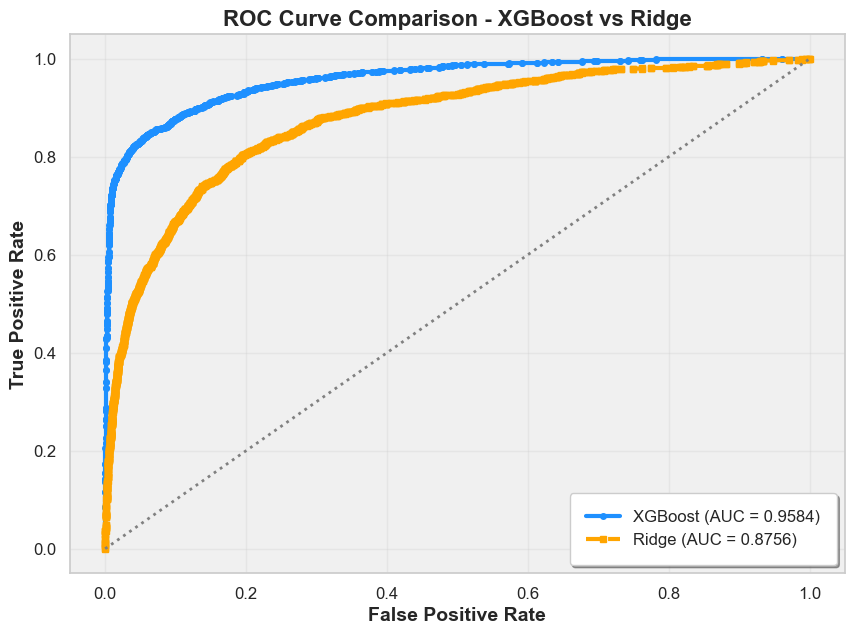

In [30]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style for plot aesthetics
sns.set(style="whitegrid")

# Train Ridge model
ridge = RidgeClassifier(random_state=42)
ridge.fit(X_train, y_train)

# Predict probabilities for Ridge using decision_function (Ridge does not provide predict_proba)
# Normalizing the decision function output to make it similar to probabilities for ROC
y_val_scores_ridge = ridge.decision_function(X_val)
y_val_pred_proba_ridge = (y_val_scores_ridge - y_val_scores_ridge.min()) / (y_val_scores_ridge.max() - y_val_scores_ridge.min())

# Calculate ROC curves for both models
fpr_xgb, tpr_xgb, _ = roc_curve(y_val, y_val_pred_proba_xgb)
fpr_ridge, tpr_ridge, _ = roc_curve(y_val, y_val_pred_proba_ridge)

# Calculate AUC scores for both models
roc_auc_ridge = roc_auc_score(y_val, y_val_pred_proba_ridge)

# Plot the ROC curves
plt.figure(figsize=(10, 7))

# Plot XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.4f})', color='dodgerblue', 
         lw=3, linestyle='-', marker='o', markersize=4)

# Plot Ridge ROC curve
plt.plot(fpr_ridge, tpr_ridge, label=f'Ridge (AUC = {roc_auc_ridge:.4f})', color='orange', 
         lw=3, linestyle='--', marker='s', markersize=4)

# Plot baseline (no predictive power)
plt.plot([0, 1], [0, 1], color='grey', linestyle=':', lw=2)

# Customize plot
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve Comparison - XGBoost vs Ridge', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(loc='lower right', fontsize=12, fancybox=True, shadow=True, borderpad=1)
plt.gca().set_facecolor('#f0f0f0')

# Show the plot
plt.show()


# 5.1 Interpretation of above ROC AUC Values:

## 5.2 Interpretation of above ROC AUC Values:
### XGBoost Validation ROC AUC: 0.9584:
#####     - An AUC of 0.9584 is excellent. This means that XGBoost's ability to distinguish between positive and negative classes (in this case, predicting whether a loan will default or not) is very high.
     
#####     - In simpler terms, XGBoost can correctly rank a randomly chosen positive instance (loan default) higher than a randomly chosen negative instance (non-default) 95.8% of the time.



### Ridge Validation ROC AUC: 0.8756:
#####   - This value is also very good, indicating a strong ability to predict loan defaults. However, it is lower than XGBoost's AUC.
    
#####   - While Ridge performs well, XGBoost is better at distinguishing between defaults and non-defaults for this dataset.






# 6. Summary of this model

#### - The XGBoost model is a better performer with an AUC of 0.9584, indicating a very high capability to predict loan defaults accurately.
#####
#### - The Ridge model, while also effective with an AUC of 0.8756, does not perform as well due to its linear nature, which may not fully capture the relationships in your dataset.
#####
#### - For this task, the XGBoost model is recommended as it provides a more precise prediction based on the ROC AUC score.
#####